# Introduction

Create a CNN also called convnet or Convolutional Neural Network.
- Computer Vision Application
- Recognise handwritten digits and characters
- Recognise objects in images and video
- Non vision applications - natural language processing, recommender systems
- 60,000 labeled digital images - training and 10,000 testing
- 28 by 28 pixels - 784 features - Numpy arrays - grayscale pixel intensity (0 - 255)
- Convnet - probabilistic classification
- 0,1,2,3,4,5,6,7,8,9 (What is the probability of the number being that)
- highest probability - predicted value

Reproducibility in keras and deeplearning
- computations are done in parallel for floating point calculations
- can produce different result in each execution

In [1]:
#Loading the data
from tensorflow.keras.datasets import mnist

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
y_train.shape

(60000,)

In [4]:
y_test.shape

(10000,)

In [5]:
y_train[5]

2

In [6]:
X_train.shape

(60000, 28, 28)

In [7]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [8]:
X_train[0].shape

(28, 28)

In [9]:
#Visualize the images

In [10]:
%matplotlib inline

In [11]:
import matplotlib.pyplot as plt

In [12]:
import seaborn as sns

In [13]:
import numpy as np

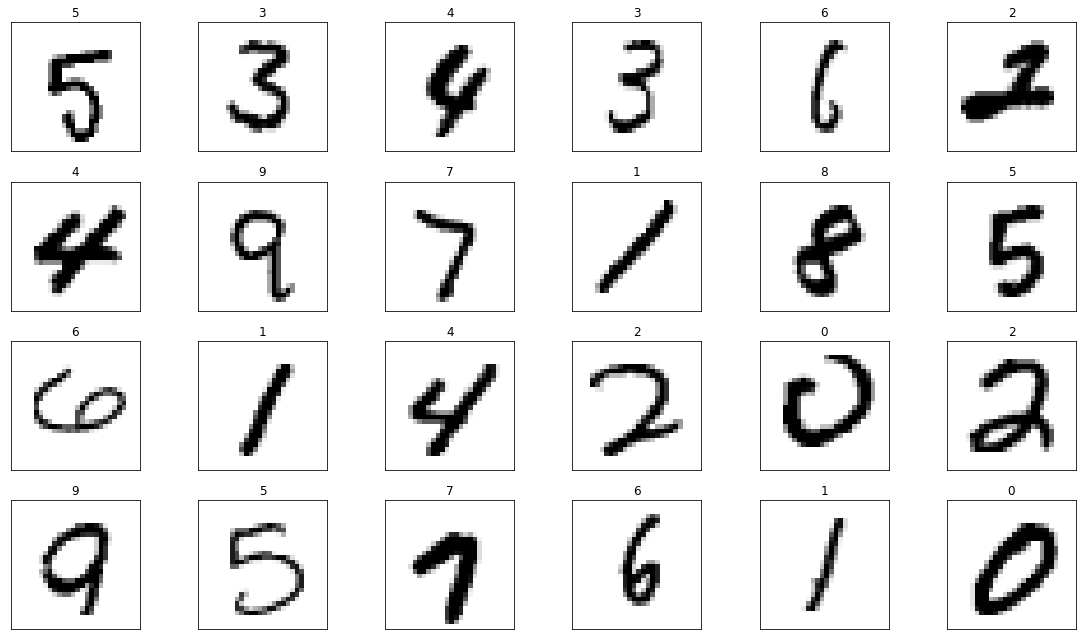

In [14]:
index=np.random.choice(np.arange(len(X_train)), 24, replace = False) #24 indices
figure, axes = plt.subplots(nrows=4, ncols=6, figsize=(16,9))
for item in zip(axes.ravel(), X_train[index], y_train[index]):
    axes, image, target = item
    axes.imshow(image, cmap=plt.cm.gray_r)
    axes.set_xticks([]) #remove x-axis marks
    axes.set_yticks([]) #remove y-axis marks
    axes.set_title(target)
plt.tight_layout()

In [15]:
#Data preparation

In [16]:
#scikit learn bundled datasets are preprocessed - shapes that the models require
#keras - convnet - some preparation for this data to work

In [17]:
#keras - Numpy arrays as inputs
#each sample must have a shape
#(width, height, channels)

In [18]:
#each pixel has one channel - grayscale 0-255
#sample sizes (28,28,1)
#neural network learns from the shapes - more channels are created
#as more channels are being  built - represent more complex features
#Those features are edges, curves, lines
#Enable the network recognize digits based on the features and how the features are combined


In [19]:
# Reshape the image data

In [20]:
X_train = X_train.reshape((60000, 28,28,1))

In [21]:
X_train.shape

(60000, 28, 28, 1)

In [22]:
X_test=X_test.reshape((10000,28,28,1))

In [23]:
X_test.shape

(10000, 28, 28, 1)

In [24]:
X_train[0] #data spans from zero to 255

array([[[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0]],

       [[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0]],

       [[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
      

In [25]:
#we need to normalize the image data.
#normalized data 0(mean) - 1(std) - /255


In [26]:
X_train = X_train.astype('float32')/255

In [27]:
X_train[0]

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        

In [28]:
X_test= X_test.astype('float32')/255

In [29]:
X_test[0]

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        

In [30]:
# One hot encoding

In [31]:
#Target
y_train[0]

5

In [32]:
#Representation in pixels
X_train[0]

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        

In [33]:
#tensorflow.keras.utils - to_categorical - one hot encoding

In [34]:
from tensorflow.keras.utils import to_categorical

In [35]:
y_train=to_categorical(y_train)

In [36]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [37]:
y_train.shape

(60000, 10)

In [38]:
y_test= to_categorical(y_test)

In [39]:
y_test.shape

(10000, 10)

# Creating the Neural Network

In [40]:
#Sequential model - stacks layers so as to execute sequentialy
#The output of one layer is the input of the next
#Feedforward network

In [41]:
from tensorflow.keras.models import Sequential

In [42]:
cnn = Sequential()

In [43]:
#adding the layers to the network

In [44]:
#a typical convnet - input layer - (training samples) , hidden layers that learn from training samples
#output - produces predictions
#import layer classes for a basic convnet

In [45]:
from tensorflow.keras.layers import Conv2D, Dense, Flatten, MaxPool2D

In [46]:
#Start by adding Convolution layer - uses the relationship between pixels that are in close proximity so that it can learn useful features - patterns
#The features that it learns becomes input for subsequent layers

In [47]:
#Examine the convolution on a 6 by 6 image
#3 by 3 represents the kernel - **hyperparameter**
#convolution performs calculations that learn from kernel's 9 features
#and outputs 1 new feature
#convolution diagram - 3 by 3 represents its iniial position

In [48]:
# complete pass - left - to -right top - to - bottom is known as a filter
# if you have a 3 * 3 kernel the output you get will be 

In [49]:
cnn.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', input_shape=(28,28,1))) # filters give us the feature map

In [50]:
28*28

784

In [51]:
#784 samples each

In [52]:
#Due to our 3*3 kernel can transform 6*6 into a 4*4, therefore our 28*28 will be 26*26
#Filter is a complete pass from left to right and top to bottom
#64 is the number of features

26*26*64

43264

In [53]:
#43264 significantly increases the dimensionality - deep learning - happens a lot

In [54]:
#Processing power is needed

### Overfitting
- too complex compared to what the model is modelling
- memorize the data features

### Adding a pooling layer
- to reduce overfitting and computational time - reduce dimensionality
- compress (down - samples ) - discarding features to generalize very well
- Max pooling is usually used , examines 2*2 square features and keeps only the maximum values

In [55]:
6*6

36

In [56]:
3*3

9

In [57]:
9/36 *100

25.0

In [58]:
(36-9)/36 * 100

75.0

In [59]:
#Dimension has reduced by 75%

In [60]:
#26*26*64 will be reduced to 13*13*64

In [61]:
cnn.add(MaxPool2D(pool_size=(2,2)))

In [62]:
#input here was 13*13
cnn.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu')) # filters give us the feature map

In [63]:
#input here will be 11*11 which will round down to 10
cnn.add(MaxPool2D(pool_size=(2,2)))
#give us a 5*5*128

# Flattening Results
- Model Final output should be a 1d array with 10 probabilities
- Flatten it to one D
- Output 1 by 3200(5*5*128)

In [64]:
5*5*128

3200

In [65]:
cnn.add(Flatten())

# Adding a Dense Layer
- 

In [66]:
cnn.add(Dense(units=128, activation='relu'))

In [68]:
#Softmax that converts values to probabilities
cnn.add(Dense(units=10, activation='softmax'))

In [69]:
#Summary of the model - shape, number of parameters, 

In [70]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 3200)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               409728    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1

In [71]:
#Visualize the model structure

In [72]:
#plot_model function from tensorflow.keras.util

In [73]:
from tensorflow.keras.utils import plot_model

In [74]:
from IPython.display import Image

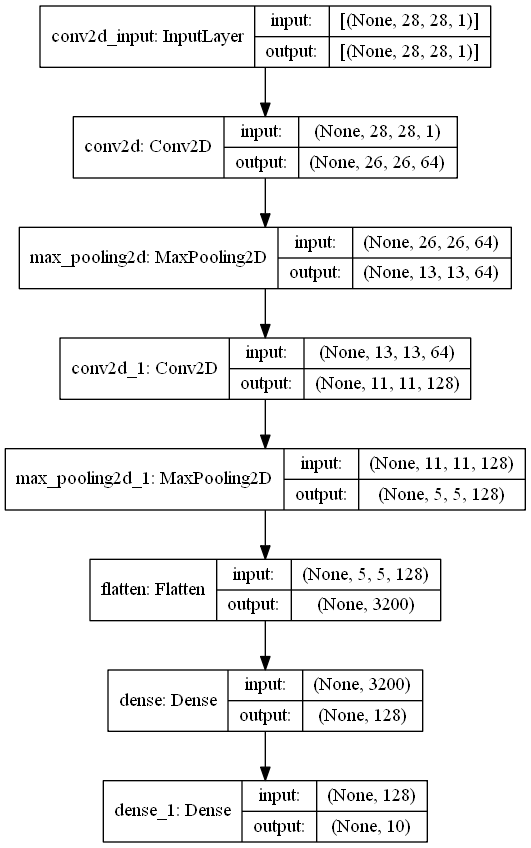

In [76]:
plot_model(cnn, to_file='convnet.png', show_shapes=True, show_layer_names=True)
Image(filename='convnet.png')

In [77]:
#Compile the model

In [78]:
cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [79]:
cnn

In [80]:
#Training and evaluating he model

In [82]:
#fit method, epochs - hyperparameter - tuned, batch_size- number of samples
#to process. 2 - 32 to 512 validation split - 10% validation
#loss and accuracy

In [83]:
cnn.fit(X_train, y_train, epochs=5, batch_size=64, validation_split=0.1)

Epoch 1/5
844/844 [==============================] - 76s 89ms/step - loss: 0.1425 - accuracy: 0.9562 - val_loss: 0.0540 - val_accuracy: 0.9850
Epoch 2/5
844/844 [==============================] - 74s 88ms/step - loss: 0.0433 - accuracy: 0.9862 - val_loss: 0.0405 - val_accuracy: 0.9882
Epoch 3/5
844/844 [==============================] - 74s 87ms/step - loss: 0.0291 - accuracy: 0.9909 - val_loss: 0.0539 - val_accuracy: 0.9868
Epoch 4/5
844/844 [==============================] - 75s 89ms/step - loss: 0.0201 - accuracy: 0.9935 - val_loss: 0.0381 - val_accuracy: 0.9898
Epoch 5/5
844/844 [==============================] - 74s 88ms/step - loss: 0.0154 - accuracy: 0.9948 - val_loss: 0.0457 - val_accuracy: 0.9880


In [84]:
#Evaluating the model on unseen data with model evaluate method

In [85]:
loss,accuracy=cnn.evaluate(X_test, y_test)

313/313 [==============================] - 4s 14ms/step - loss: 0.0360 - accuracy: 0.9883


In [86]:
loss

0.03600973263382912

In [87]:
accuracy

0.9883000254631042

In [88]:
#without tuning the convnet we have achieved 99% accuracy on unseen data

In [89]:
#Making predictions with model's predict method

In [90]:
predictions=cnn.predict(X_test)

In [91]:
y_test[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [92]:
predictions[0]

array([1.1965262e-10, 9.4614386e-11, 2.1290423e-07, 2.9203673e-07,
       1.1461198e-12, 2.1152819e-09, 4.3759197e-13, 9.9999952e-01,
       5.8993712e-09, 3.7733965e-08], dtype=float32)

In [94]:
for index, probability in enumerate(predictions[0]):
    print(f'{index} : {probability: .10%}')

0 :  0.0000000120%
1 :  0.0000000095%
2 :  0.0000212904%
3 :  0.0000292037%
4 :  0.0000000001%
5 :  0.0000002115%
6 :  0.0000000000%
7 :  99.9999523163%
8 :  0.0000005899%
9 :  0.0000037734%


In [95]:
#Locate the incorrect predictions

In [96]:
#Initiate the sample (28,28,1) - keras - (28,28)

In [97]:
images=X_test.reshape((10000,28,28))

In [98]:
incorrect_predictions = []

In [101]:
for i, (p,e) in enumerate(zip(predictions, y_test)):
    predicted, expected = np.argmax(p), np.argmax(e)
    if predicted != expected:
        incorrect_predictions.append((i,images[i], predicted, expected))

In [102]:
len(incorrect_predictions)

117

In [103]:
y_test.shape

(10000, 10)

In [104]:
((10000-117)/10000) * 100

98.83

In [105]:
#Visualizing incorret predictions

AttributeError: module 'matplotlib.pyplot' has no attribute 'tightlayout'

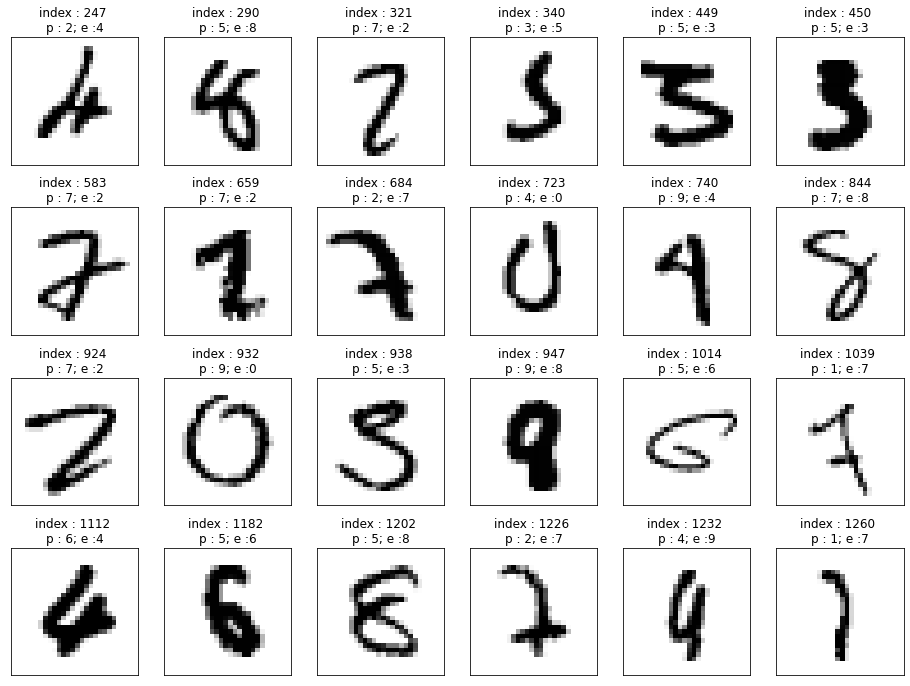

In [110]:
figure, axes = plt.subplots(nrows=4, ncols=6, figsize=(16,12))

for axes, item in zip(axes.ravel(), incorrect_predictions):
    index, image, predicted, expected = item
    axes.imshow(image, cmap=plt.cm.gray_r)
    axes.set_xticks([])
    axes.set_yticks([])
    axes.set_title(f'index : {index} \np : {predicted}; e :{expected}')
plt.tightlayout()

In [111]:
def display_probabilities(prediction):
    for index, probability in enumerate(prediction):
        print(f'{index}: {probability: .10%}')

In [112]:
display_probabilities(predictions[1232])

0:  0.0265635579%
1:  0.0224778822%
2:  0.0637653633%
3:  0.0000039200%
4:  93.0256962776%
5:  0.0014665726%
6:  0.1088881865%
7:  0.0009105243%
8:  0.0194954031%
9:  6.7307338119%


In [113]:
cnn.save('mnist_cnn.h5')